# Anomaly Detection Assignments

## 1. Isolation Forests

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
sns.set()
import datetime as dt
plt.style.use("seaborn-v0_8")
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving tripadvisor_reviews.csv to tripadvisor_reviews.csv


In [ ]:
# 1a. Open the tripadvisor_reviews.csv file
df = pd.read_csv('tripadvisor_reviews.csv')
df

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
0,User 1,1.9300,2.8000,3.2900,1.6200
1,User 2,2.0200,3.2000,3.6600,1.6400
2,User 3,2.2200,1.8000,1.5400,1.5300
3,User 4,1.4500,2.8000,1.2900,1.5700
4,User 5,1.5100,2.2000,2.1800,1.5700
...,...,...,...,...,...
975,User 976,1.7400,2.1200,1.3000,1.5300
976,User 977,2.2500,1.9200,2.1200,1.3800
977,User 978,1.6100,2.3200,1.6700,1.4300
978,User 979,1.9300,1.2000,1.1300,1.4300


In [ ]:
# 1b. Remove the user_id column
X = df.drop(labels= ["user_id"], axis = 'columns')
X

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
0,1.9300,2.8000,3.2900,1.6200
1,2.0200,3.2000,3.6600,1.6400
2,2.2200,1.8000,1.5400,1.5300
3,1.4500,2.8000,1.2900,1.5700
4,1.5100,2.2000,2.1800,1.5700
...,...,...,...,...
975,1.7400,2.1200,1.3000,1.5300
976,2.2500,1.9200,2.1200,1.3800
977,1.6100,2.3200,1.6700,1.4300
978,1.9300,1.2000,1.1300,1.4300


In [ ]:
# 1c. View the min and max of each rating
X.describe().loc[['min', 'max'], :].T

,min,max
avg_museum_rating,1.3400,4.2200
avg_park_rating,1.0000,4.6400
avg_restaurant_rating,1.1300,4.6200
avg_nightlife_rating,1.1500,4.4400


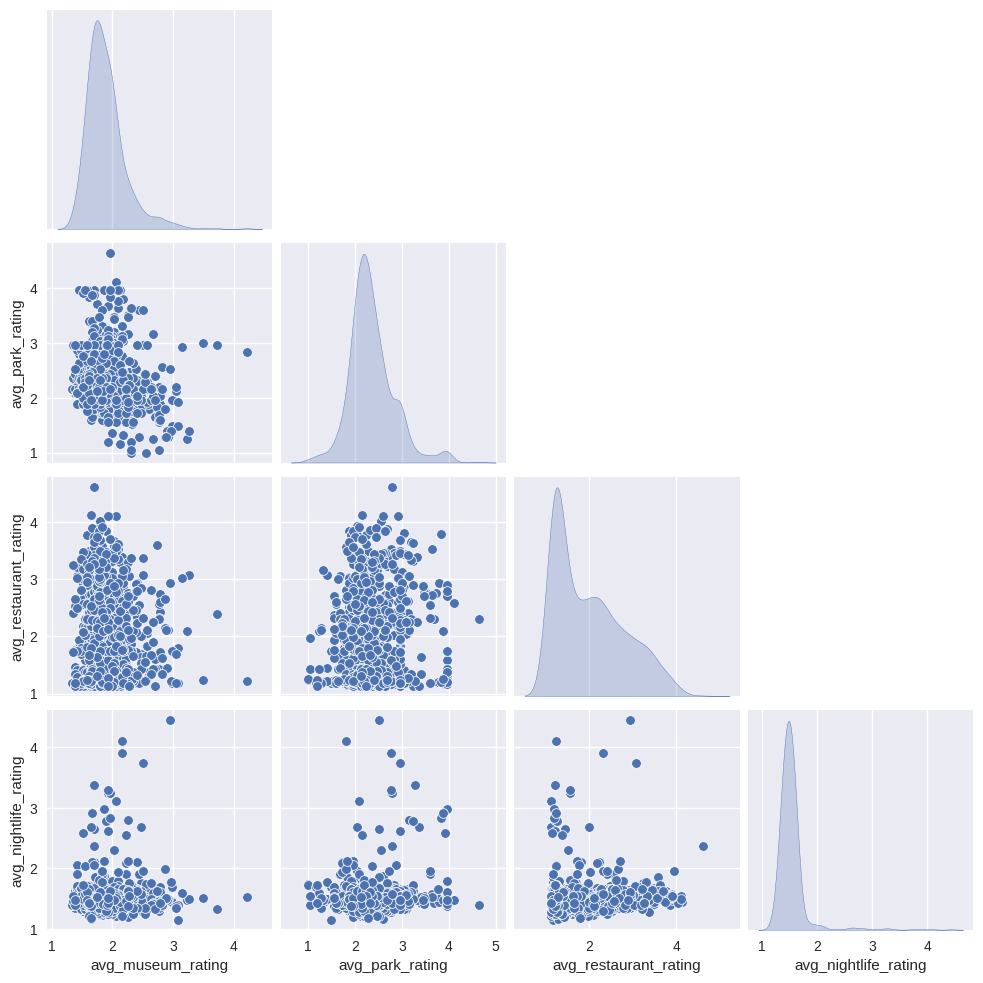

In [ ]:
# 2. Visualize the data using a seaborn pair plot
sns.pairplot(X ,
             corner = True ,
             diag_kind = 'kde')
plt.show()

In [ ]:
# 3. Fit an Isolation Forest model using a contamination of 1%
from sklearn.ensemble import IsolationForest
model_01 = IsolationForest(contamination= 0.01, random_state= 42)
model_01.fit(X)
df = df.assign(anomaly_scores_01 = model_01.decision_function(X),
               anomaly_01 = model_01.predict(X)).sort_values(["anomaly_scores_01"])

In [ ]:
df

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly_scores_01,anomaly_01
666,User 667,2.9500,2.5200,2.9400,4.4400,-0.0822,-1
247,User 248,2.5000,2.9600,3.0800,3.7300,-0.0537,-1
728,User 729,1.8600,3.9600,1.2100,2.9800,-0.0249,-1
601,User 602,2.1500,1.8000,1.2600,4.1000,-0.0213,-1
915,User 916,1.7000,2.8000,4.6200,2.3700,-0.0143,-1
...,...,...,...,...,...,...,...
22,User 23,1.9300,2.1600,1.2900,1.4100,0.2722,1
613,User 614,1.6700,2.2800,1.2600,1.5100,0.2731,1
418,User 419,1.6400,2.2400,1.2600,1.4300,0.2734,1
471,User 472,1.7400,2.2800,1.3000,1.4300,0.2752,1


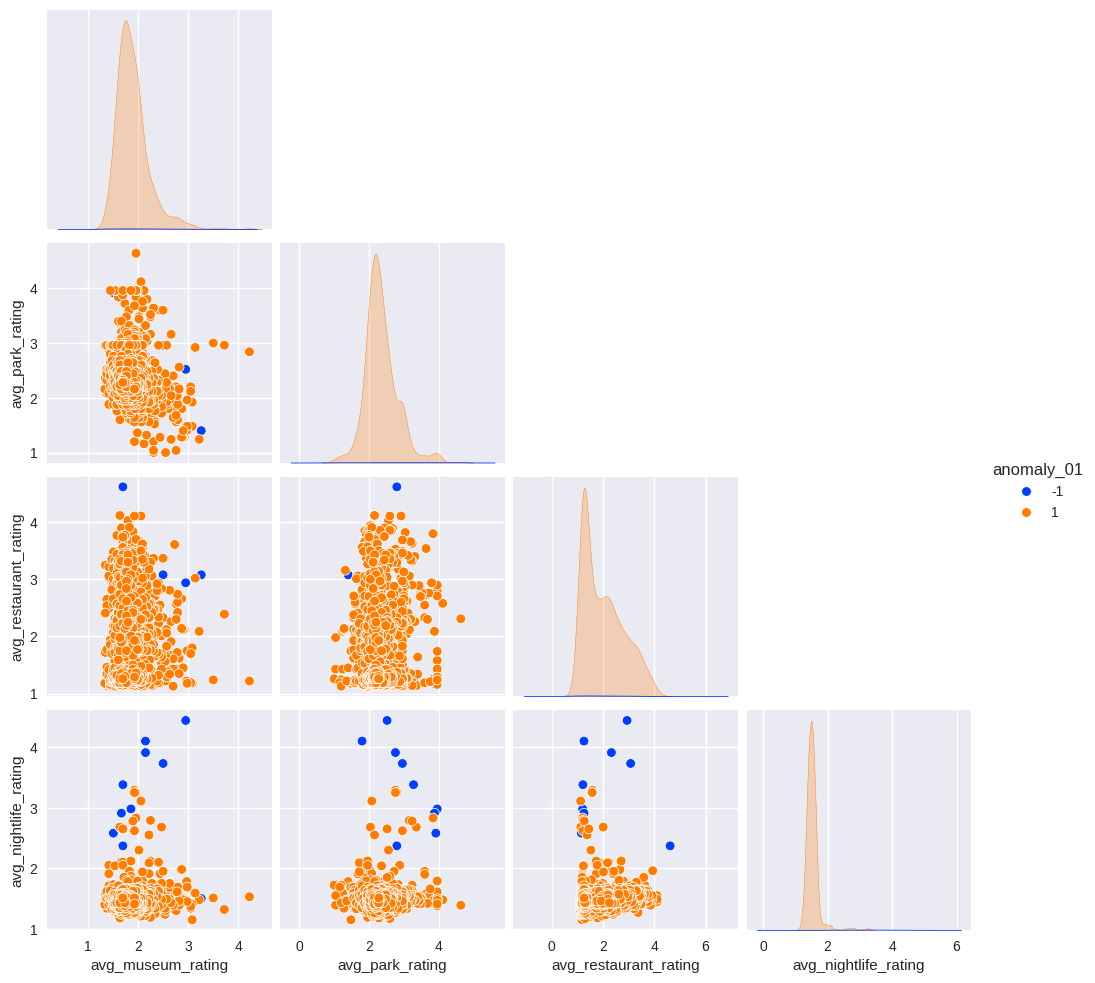

In [ ]:
# 4. Visualize the anomalies on the seaborn pair plot
sns.pairplot(df.drop(columns=["anomaly_scores_01"]) ,
             corner = True,
             diag_kind='kde',
             hue = 'anomaly_01',
             palette = 'bright')
plt.show()

In [ ]:
# 5. Where do you notice anomalies in the pair plot?

In [ ]:
# 6. Modify the contamination to 0.5% to capture fewer anomalies and visualize the differences
model_005 = IsolationForest(contamination = 0.005 , random_state= 42)
model_005.fit(X)
df = df.assign(anomaly_scoes_005 = model_005.decision_function(X),
               anomaly_005 = model_005.predict(X))
df.sort_values('anomaly_scoes_005').head()

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly_scores_01,anomaly_01,anomaly_scoes_005,anomaly_005
546,User 547,1.6100,2.6400,1.1800,1.4600,0.2414,1,-0.0707,-1
13,User 14,1.5800,2.6400,3.2700,1.4500,0.1876,1,-0.0423,-1
391,User 392,1.8300,2.2400,1.5800,1.2900,0.2468,1,-0.0134,-1
825,User 826,1.6700,2.3600,2.2800,1.6500,0.2362,1,-0.0098,-1
518,User 519,1.9600,2.2800,1.2200,1.3700,0.2611,1,-0.0028,-1


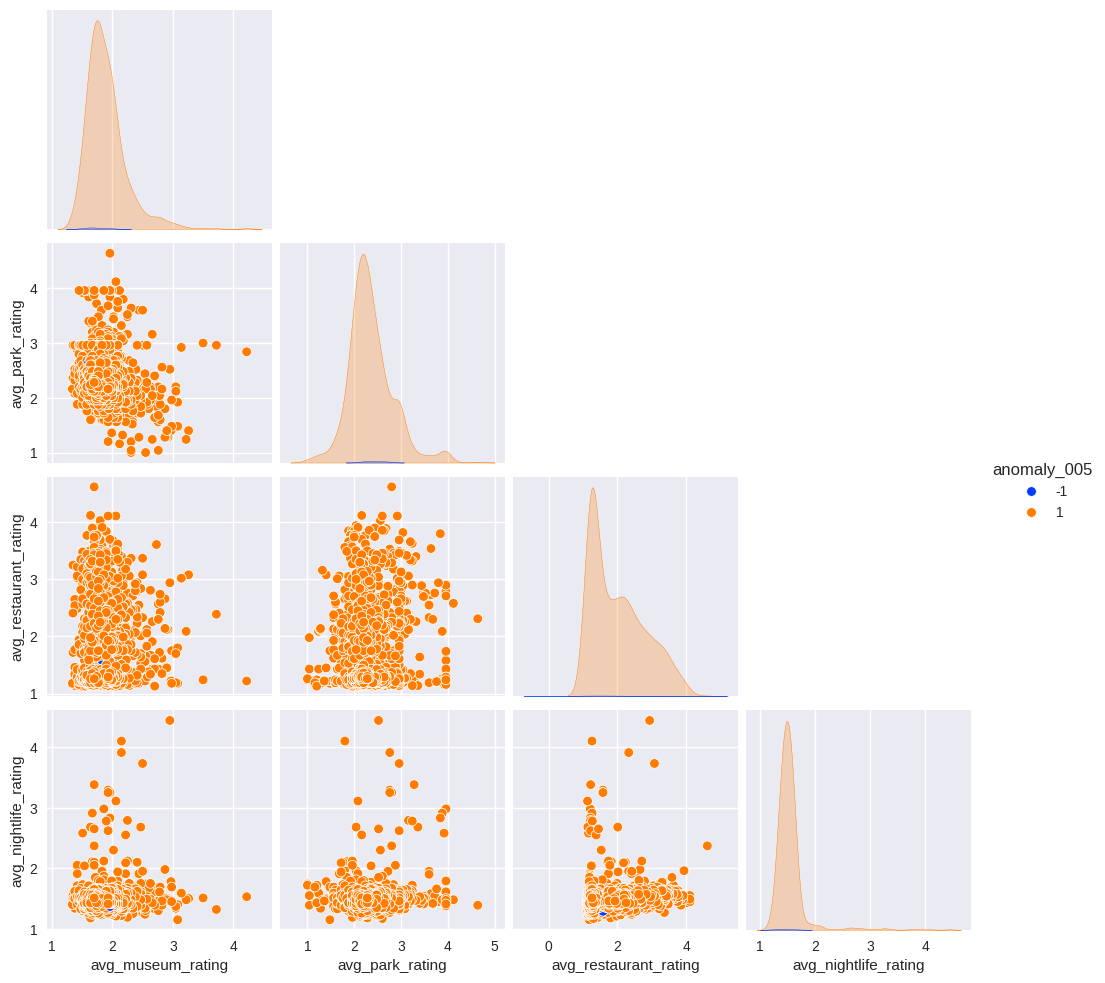

In [ ]:
sns.pairplot(df.drop(columns = ["anomaly_scores_01",	"anomaly_01",	"anomaly_scoes_005"]),
             corner = True,
             diag_kind='kde',
             hue = 'anomaly_005',
             palette = 'bright')
plt.show()

## 2. DBSCAN

In [ ]:
# 1. Paste the DBSCAN function from the anomaly detection demo notebook that loops through multiple eps and min_samples values to fit multiple DBSCAN models
def tune_dbscan(data):
  import numpy as np
  import pandas as pd
  from sklearn.preprocessing import StandardScaler
  from sklearn.cluster import DBSCAN
  from sklearn.metrics import silhouette_score

  std_scaler = StandardScaler()
  data_standard = std_scaler.fit_transform(data)

  EPS = np.arange(0.1 , 2, 0.1)
  MIN_Samples = np.arange(2,10,1)


  results = []

  # To calculate the number of clusters , noise_points , & Silhouette Score:
  for eps in EPS:
    for j in MIN_Samples:
        dbscan = DBSCAN(eps ,min_samples= j)
        dbscan.fit(data_standard)
        labels = dbscan.labels_

        #number of clusters
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        #noise_points
        number_of_noise = list(labels).count(-1)

        #Silhouette Score
        if n_clusters > 1:
          sil_score = silhouette_score(data_standard, labels, metric = 'euclidean', sample_size= None)
        else:
          None

        results.append([eps,j,n_clusters, number_of_noise,sil_score])

  dbscan_result = pd.DataFrame(results,
                               columns = ["EPS",
                                          "MIN_Samples",
                                          "Number_of_Clusters",
                                          "Number_of_Noise_Points" ,
                                          "Silhouette_Scores"]

                               )
  dbscan_result.sort_values(by = ["Silhouette_Scores"], ascending= False, inplace=True)
  return dbscan_result


In [ ]:
# 2. Apply the function on the tourist rating data set
tune_dbscan(X)

,EPS,MIN_Samples,Number_of_Clusters,Number_of_Noise_Points,Silhouette_Scores
121,1.6000,3,2,10,0.6359
120,1.6000,2,2,10,0.6359
123,1.6000,5,1,15,0.6343
122,1.6000,4,2,11,0.6343
137,1.8000,3,2,9,0.6322
...,...,...,...,...,...
3,0.1000,5,0,980,-0.4346
4,0.1000,6,0,980,-0.4346
10,0.2000,4,9,914,-0.4392
9,0.2000,3,30,836,-0.4407


In [ ]:
# 3. Find the highest silhouette score and note down the eps and min_samples values
# eps = 1.6000 , min_samples= 3

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_standard = std_scaler.fit_transform(X)
X_standard

array([[ 0.11264465,  0.93588703,  1.6197497 ,  0.31295986],
       [ 0.38808847,  1.77264397,  2.08917107,  0.38449354],
       [ 1.00018585, -1.15600533, -0.60048651, -0.00894171],
       ...,
       [-0.86671115, -0.06822131, -0.43555468, -0.36661012],
       [ 0.11264465, -2.41114075, -1.12065614, -0.36661012],
       [ 0.11264465, -1.6580595 ,  0.14805027, -0.08047539]])

In [ ]:
# 4. Fit a single DBSCAN model using those eps and min_sample values
from sklearn.cluster import DBSCAN
dbscan_tunned = DBSCAN(eps = 1.6000 , min_samples= 3, metric = 'euclidean')
dbscan_tunned.fit(X_standard)

DBSCAN(eps=1.6, min_samples=3)

In [ ]:
# 5. Note the anomalies (-1) and visualize them on a pair plot
dbscan_tunned.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
np.unique(dbscan_tunned.labels_)

array([-1,  0,  1])

In [ ]:
df['anomaly_dbscan'] = pd.Series(dbscan_tunned.labels_)

In [ ]:
df

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly_scores_01,anomaly_01,anomaly_scoes_005,anomaly_005,anomaly_dbscan
666,User 667,2.9500,2.5200,2.9400,4.4400,-0.0822,-1,0.2002,1,-1
247,User 248,2.5000,2.9600,3.0800,3.7300,-0.0537,-1,0.1160,1,-1
728,User 729,1.8600,3.9600,1.2100,2.9800,-0.0249,-1,0.2293,1,0
601,User 602,2.1500,1.8000,1.2600,4.1000,-0.0213,-1,0.2040,1,-1
915,User 916,1.7000,2.8000,4.6200,2.3700,-0.0143,-1,0.2295,1,-1
...,...,...,...,...,...,...,...,...,...,...
22,User 23,1.9300,2.1600,1.2900,1.4100,0.2722,1,0.2795,1,0
613,User 614,1.6700,2.2800,1.2600,1.5100,0.2731,1,0.2216,1,0
418,User 419,1.6400,2.2400,1.2600,1.4300,0.2734,1,0.2604,1,0
471,User 472,1.7400,2.2800,1.3000,1.4300,0.2752,1,0.1373,1,0


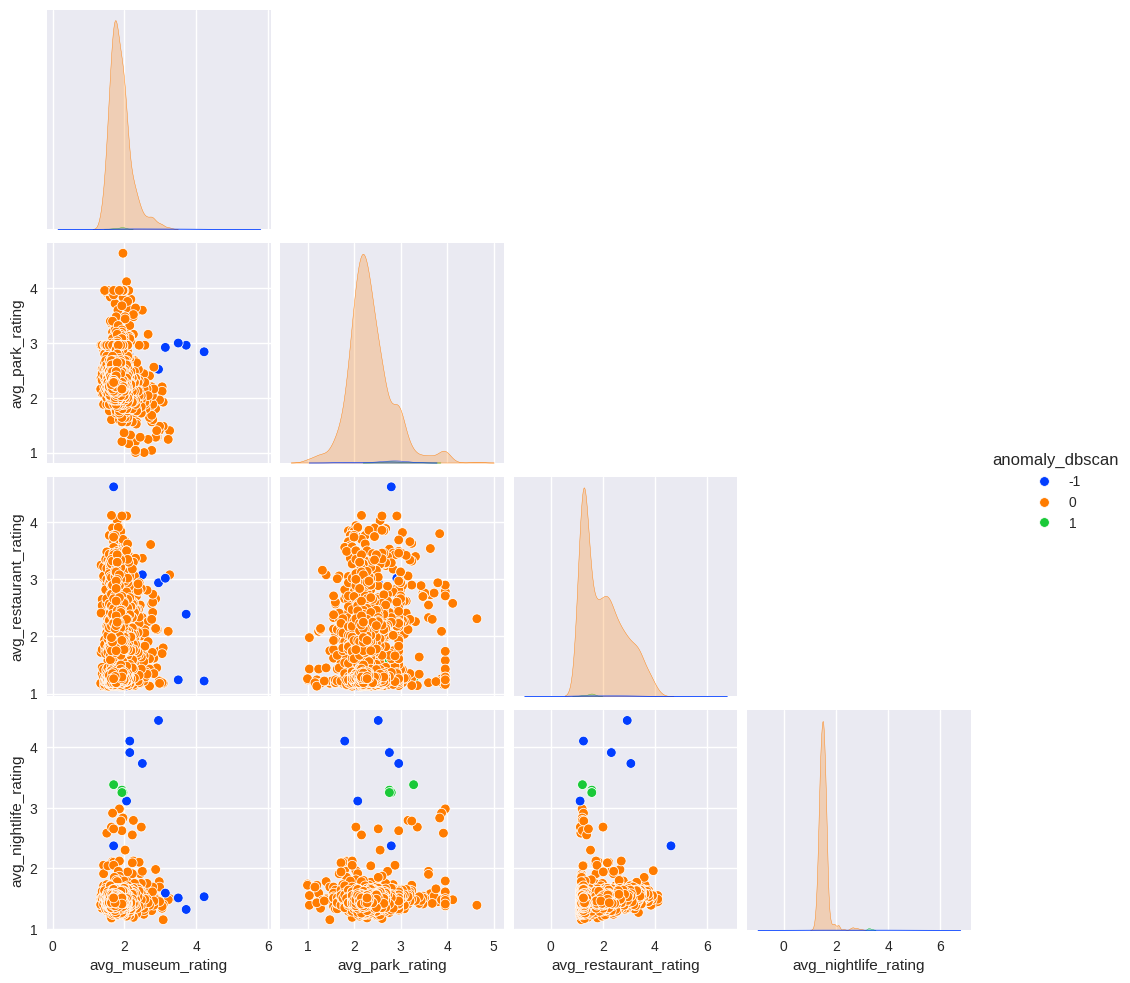

In [ ]:
sns.pairplot(df.drop(columns =['anomaly_scores_01','anomaly_01','anomaly_scoes_005','anomaly_005']) ,
             corner = True,
             diag_kind= 'kde',
             hue = 'anomaly_dbscan',
             palette='bright')
plt.show()

In [ ]:
df.anomaly_dbscan.value_counts()

,count
anomaly_dbscan,
0,966
-1,10
1,4
